--- 0.17616677284240723 seconds ---


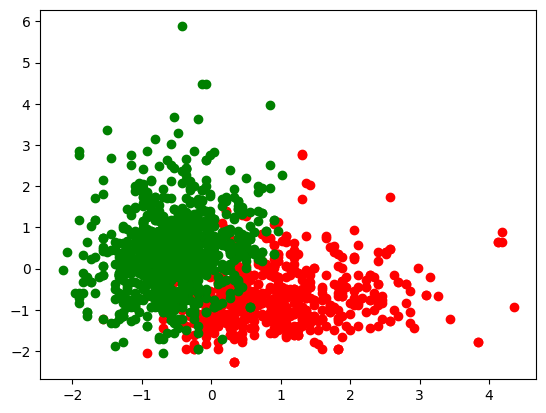

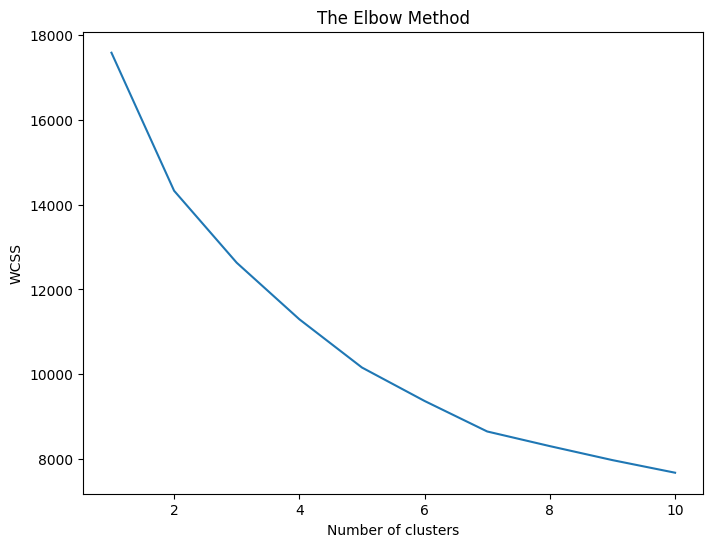

Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

<Figure size 2000x1500 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import time 
from datetime import date
from sklearn import metrics
from sklearn.metrics import pairwise_distances



wine = pd.read_csv('winequality-red.csv')
wine.shape

X = wine.iloc[:,0:11]
y = wine['quality']

X_scaled = StandardScaler().fit_transform(X)


#Applying kmeans to data, k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()                                                                                               
clusters = kmeans.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_


#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
#plt.legend()  

#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Visualize clusters considering fixed acidity, residual sugar and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,0], X_scaled[:,3], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)
#Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

In [8]:
pip install seaborn

     ------------------------------------ 285.1/285.1 kB 366.5 kB/s eta 0:00:00
  Using cached matplotlib-3.6.0-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.5-cp310-cp310-win_amd64.whl (164 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 38.6/38.6 MB 443.5 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 307.1 kB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 177.6 kB/s eta 0:00:00
     ------------------------------------ 960.0/960.0 kB 799.4 kB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 164.1/164.1 kB 900.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python310\\share'
Consider using the `--user` option or check the permissions.

